In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Importing graphs
G=nx.read_graphml('connectcomp.graphml')
#Importing the labels
BG=nx.read_graphml('bipartitegraph.graphml')
BGlabels=nx.get_node_attributes(BG,'label')

In [2]:
print(nx.info(G))
print(len(BGlabels))
print({k: BGlabels[k] for k in list(BGlabels)[:2]})

Name: 
Type: Graph
Number of nodes: 6449
Number of edges: 168211
Average degree:  52.1665
19427
{'1': '24-HOUR MAN/EMMANUEL', '2': '3-D MAN/CHARLES CHAN'}


## What happens when we remove high centrality nodes?

In [3]:
# returns the index in the dictionary of a given vertice
def get_vertice_index(g, name):
    for key, value in g.items():
        if value == name:
            return key

# removes nodes of degree 1
def remove_nodes_deg_1(g):
    to_be_removed = []
    for ver in G.nodes():
        if G.degree(ver) == 1:
            to_be_removed.append(ver)
    if len(to_be_removed) == 0:
        print('No nodes were removed')
    else:
        G.remove_nodes_from(to_be_removed)

# Checks if there are nodes of degree 1
def deg1_node_Q(g):
    for ver in G.nodes():
        if G.degree(ver) == 1:
            print('node of degree 1: ', ver, 'connected to: ', BGlabels.get(list(G[ver].keys())[0]))
            return True
    return False

First we check if our network has any nodes of degree 1

In [4]:
# making a copy of G
Gcopy = G.copy()
deg1_node_Q(Gcopy)

node of degree 1:  306 connected to:  DR. STRANGE/STEPHEN 


True

---

Now we delete any node of degree 1

In [5]:
remove_nodes_deg_1(Gcopy)
print(nx.is_connected(Gcopy))
print(deg1_node_Q(Gcopy))

True
False


---
Now we find the indexes of the superheroes of high betweenness centrality

In [6]:
high_centrality_nodes = ['THING/BENJAMIN J. GR',
                         'DR. STRANGE/STEPHEN ',
                         'WOLVERINE/LOGAN ',
                         'IRON MAN/TONY STARK ',
                         'HAVOK/ALEX SUMMERS ',
                         'CAPTAIN AMERICA',
                         'SPIDER-MAN/PETER PAR',
                        ]
for hero in high_centrality_nodes:
    Gcopy.remove_node(get_vertice_index(BGlabels,hero))
    print('removing ' + hero + ' ... is the network still conected?: ' + str(nx.is_connected(Gcopy)))
    # we need to copy the graph again 
    Gcopy = G.copy()

removing THING/BENJAMIN J. GR ... is the network still conected?: False
removing DR. STRANGE/STEPHEN  ... is the network still conected?: True
removing WOLVERINE/LOGAN  ... is the network still conected?: False
removing IRON MAN/TONY STARK  ... is the network still conected?: True
removing HAVOK/ALEX SUMMERS  ... is the network still conected?: False
removing CAPTAIN AMERICA ... is the network still conected?: False
removing SPIDER-MAN/PETER PAR ... is the network still conected?: True


In [7]:
Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'CAPTAIN AMERICA'))
print(nx.number_connected_components(Gcopy))
print([len(c) for c in sorted(nx.connected_components(Gcopy), key=len, reverse=True)])

2
[6391, 6]


In [8]:
Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '))
print(nx.number_connected_components(Gcopy))
print([len(c) for c in sorted(nx.connected_components(Gcopy), key=len, reverse=True)])

2
[6271, 126]


**Plotting what happens when we remove Havok from the graph**

<IPython.core.display.Javascript object>


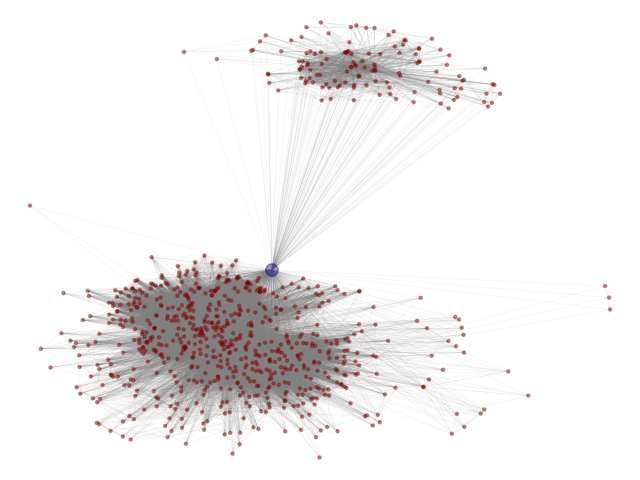

In [9]:
%matplotlib notebook

pos = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): (0, 0)}

Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '))
components = sorted(nx.connected_components(Gcopy), key=len, reverse=True)
small_comp = []
l_comp = []
for vert in components[1]:
    small_comp.append(vert)
for i, vert in zip(range(800), G[get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')]):
    l_comp.append(vert)
sub_graph = G.subgraph(small_comp + [get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')] + l_comp)
# Specific color for HAVOK
c_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 0.25}
values = [c_vals.get(node, 0.9) for node in sub_graph.nodes()]
# Specific size for Havok
size_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 80}
sizes = [size_vals.get(node, 5) for node in sub_graph.nodes()]
#sub_graph = G.subgraph(small_comp)

options = {
    'node_size': 5,
    'line_color': 'grey',
    'linewidths': 1,
    'width': 0.1,
    'alpha': 0.4,
    'node_color': values,
    'node_size': sizes,
    'edge_color': 'grey'
}

nx.draw(sub_graph, cmap=plt.get_cmap('jet'), **options)
plt.show()

<IPython.core.display.Javascript object>


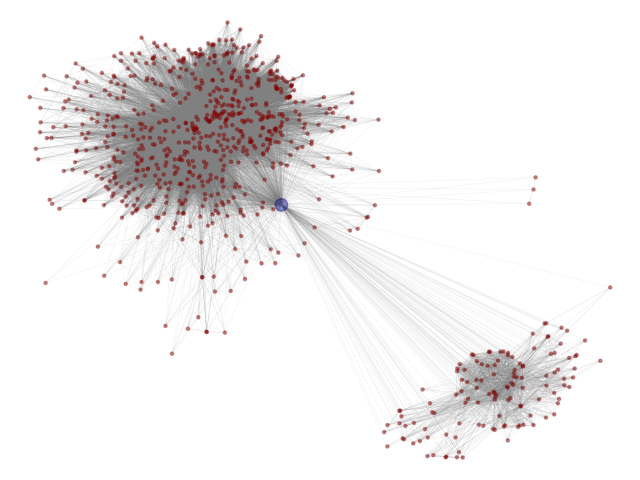

In [10]:
%matplotlib notebook

pos = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): (0, 0)}

Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '))
components = sorted(nx.connected_components(Gcopy), key=len, reverse=True)
small_comp = []
l_comp = []
for vert in components[1]:
    small_comp.append(vert)
for i, vert in zip(range(800), G[get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')]):
    l_comp.append(vert)
sub_graph = G.subgraph(small_comp + [get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')] + l_comp)
# Specific color for HAVOK
c_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 0.25}
values = [c_vals.get(node, 0.9) for node in sub_graph.nodes()]
# Specific size for Havok
size_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 80}
sizes = [size_vals.get(node, 5) for node in sub_graph.nodes()]
#sub_graph = G.subgraph(small_comp)

options = {
    'node_size': 5,
    'line_color': 'grey',
    'linewidths': 1,
    'width': 0.1,
    'alpha': 0.4,
    'node_color': values,
    'node_size': sizes,
    'edge_color': 'grey'
}

nx.draw_spring(sub_graph, cmap=plt.get_cmap('jet'), **options)
plt.show()

<IPython.core.display.Javascript object>


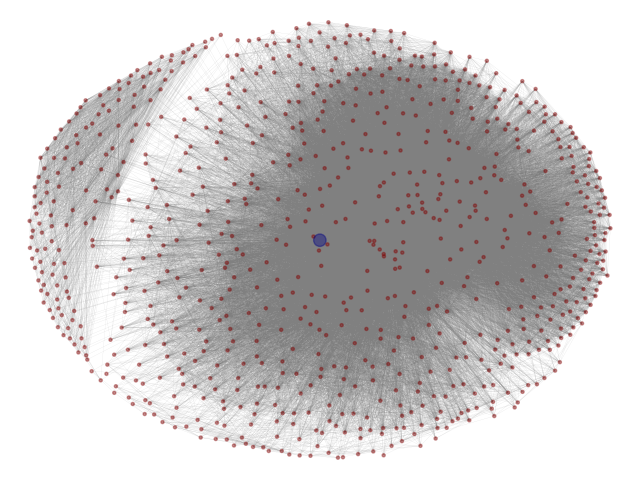

In [11]:
%matplotlib notebook

pos = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): (0, 0)}

Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '))
components = sorted(nx.connected_components(Gcopy), key=len, reverse=True)
small_comp = []
l_comp = []
for vert in components[1]:
    small_comp.append(vert)
for i, vert in zip(range(800), G[get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')]):
    l_comp.append(vert)
sub_graph = G.subgraph(small_comp + [get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS ')] + l_comp)
# Specific color for HAVOK
c_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 0.25}
values = [c_vals.get(node, 0.9) for node in sub_graph.nodes()]
# Specific size for Havok
size_vals = {get_vertice_index(BGlabels,'HAVOK/ALEX SUMMERS '): 80}
sizes = [size_vals.get(node, 5) for node in sub_graph.nodes()]
#sub_graph = G.subgraph(small_comp)

options = {
    'node_size': 5,
    'line_color': 'grey',
    'linewidths': 1,
    'width': 0.1,
    'alpha': 0.4,
    'node_color': values,
    'node_size': sizes,
    'edge_color': 'grey'
}

nx.draw_kamada_kawai(sub_graph, cmap=plt.get_cmap('jet'), **options)
plt.show()

In [ ]:
Gcopy = G.copy()
Gcopy.remove_node(get_vertice_index(BGlabels,'WOLVERINE/LOGAN '))
print(nx.number_connected_components(Gcopy))
print([len(c) for c in sorted(nx.connected_components(Gcopy), key=len, reverse=True)])